# Optimisation de la production d’une usine de fabrication de voitures

#### Importer le module pywraplp d'OR-Tools :

In [1]:
from ortools.linear_solver import pywraplp

#### Créer une instance du solveur linéaire :

In [2]:
solver = pywraplp.Solver.CreateSolver('SCIP')

#### Définir les variables de décision :

In [3]:
x1 = solver.IntVar(0, solver.infinity(), 'x1')  # Nombre de voitures économiques
x2 = solver.IntVar(0, solver.infinity(), 'x2')  # Nombre de voitures sport

#### Définir la fonction objectif à maximiser :

In [4]:
objective = 22410 * x1 + 33230 * x2
solver.Maximize(objective)

#### Ajouter les contraintes au solveur :

In [5]:
constraint1 = solver.Constraint(0, 1500)
constraint1.SetCoefficient(x1, 3.5)
constraint1.SetCoefficient(x2, 4)

constraint2 = solver.Constraint(0, 2000)
constraint2.SetCoefficient(x1, 2)
constraint2.SetCoefficient(x2, 3)

constraint3 = solver.Constraint(120, solver.infinity())
constraint3.SetCoefficient(x1, 1)

#### Résolver le problème en appelant la méthode Solve() du solveur :

In [6]:
solver.Solve()

0

#### Obtenir la solution optimale :

In [7]:
print('\033[1m\033[32mSolution optimale :\033[0m')
print('\033[1m\033[32mx1 =\033[0m', x1.solution_value())
print('\033[1m\033[32mx2 =\033[0m', x2.solution_value())
print('\033[1m\033[32mProfit =\033[0m', solver.Objective().Value())

Solution optimale :
x1 = 120.0
x2 = 270.0
Profit = 11661299.999999998


#### Affichage des résultats optimisés du problème de production de voitures

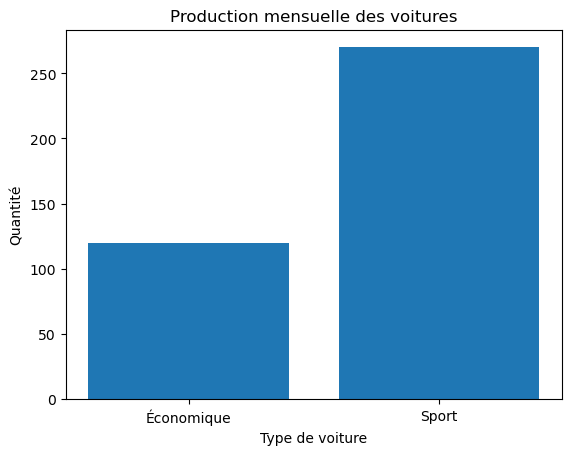

In [8]:
import matplotlib.pyplot as plt

types = ['Économique', 'Sport']
quantities = [x1.solution_value(), x2.solution_value()]

plt.bar(types, quantities)

plt.xlabel('Type de voiture')
plt.ylabel('Quantité')
plt.title('Production mensuelle des voitures')

plt.show()
